In [14]:
from CommonFunctions import CVE_Functions
from CommonFunctions import LangevinFunctions
CVE_F = CVE_Functions.CVE()
LF_F = LangevinFunctions.LF()
import numpy as np

In [175]:
DT = 10
NAxes = 1
TStep = 1
NSteps = 100
coords = LF_F.BrownianTrans(DT, NAxes, TStep, NSteps)
X = coords[0]

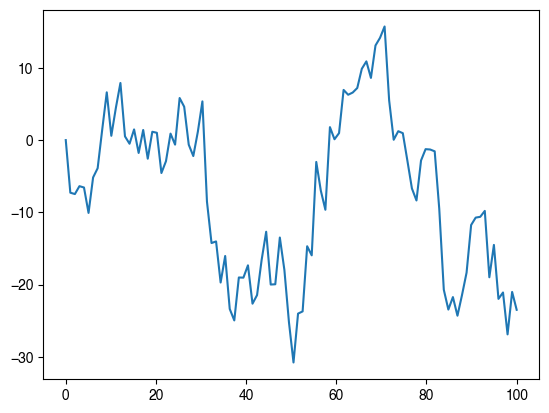

In [176]:
import matplotlib.pyplot as plt
t = np.linspace(0, NSteps*TStep, NSteps)
plt.plot(t, X)

In [177]:
D, sigma, varD = CVE_F.CVE_Eq14(X, t)

In [178]:
sigma

2.2783690178820764

In [179]:
from scipy import fft
DST = TStep*(0.5*fft.dst(np.diff(X), type=1))

In [180]:
def theory_value(D, deltaT, sigma, R, k, N):
    term1 = np.multiply(D, np.square(deltaT))
    term2_1 = np.multiply(np.square(sigma), deltaT)
    term2_2 = np.multiply(2., np.multiply(D, np.multiply(R, np.square(deltaT))))
    term3 = np.subtract(1., np.cos(np.divide(np.multiply(np.pi, k), np.add(N, 1.))))
    term2 = np.multiply(np.multiply(2., np.subtract(term2_1, term2_2)), term3)
    return np.add(term1, term2)

(0.0, 5.0)

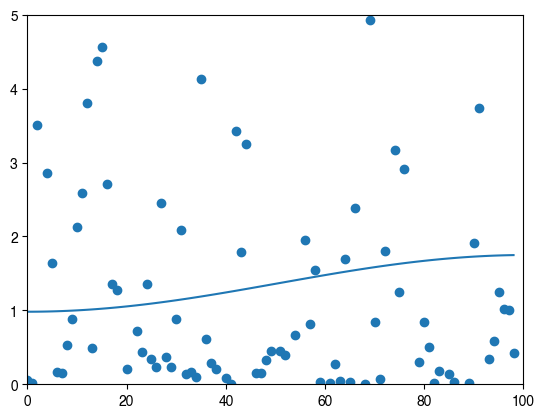

In [181]:
Pk = (2*np.square(DST))/(TStep*(NSteps+1))
k = np.arange(0, len(DST))
A = theory_value(D, TStep, sigma, 1./6, k, len(X))/(DT*np.square(TStep))
plt.scatter(k, Pk/(DT*np.square(TStep)))
plt.plot(k, A)
#plt.yscale('log')
plt.xlim([0, 100])
plt.ylim([0, 5])

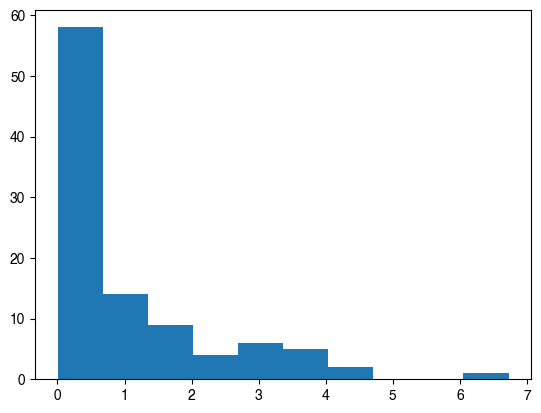

In [183]:
plt.hist(Pk/np.mean(Pk));
plt.show()